In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_data.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
for cols in df.columns:
    print(df[cols].value_counts())
    print("---------")

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64
---------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
---------
Male      5457
Female    4543
Name: Gender, dtype: int64
---------
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
---------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
---------
0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
             ... 
130306.49       1
92895.56        1
132005.77       1
166287.85       1
104001.38       1
Name: Balance, Length: 6382, dtype: int64
---------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
---------
1    7055
0    2945
N

In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=11))
model.add(Dense(10, activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 4s 11ms/step - loss: 0.5604 - accuracy: 0.7475 - val_loss: 0.5039 - val_accuracy: 0.8000
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4648 - accuracy: 0.8019 - val_loss: 0.4505 - val_accuracy: 0.8094
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4311 - accuracy: 0.8072 - val_loss: 0.4291 - val_accuracy: 0.8156
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8166 - val_loss: 0.4170 - val_accuracy: 0.8200
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8245 - val_loss: 0.4058 - val_accuracy: 0.8231
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3954 - accuracy: 0.8342 - val_loss: 0.3958 - val_accuracy: 0.8288
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3852 - accuracy: 0.8409 - val_loss: 0.3847 - val_accuracy: 0.836

Epoch 58/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3294 - accuracy: 0.8664 - val_loss: 0.3412 - val_accuracy: 0.8587
Epoch 59/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3295 - accuracy: 0.8639 - val_loss: 0.3407 - val_accuracy: 0.8556
Epoch 60/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3290 - accuracy: 0.8652 - val_loss: 0.3426 - val_accuracy: 0.8512
Epoch 61/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.8667 - val_loss: 0.3431 - val_accuracy: 0.8500
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.8653 - val_loss: 0.3418 - val_accuracy: 0.8537
Epoch 63/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3293 - accuracy: 0.8650 - val_loss: 0.3442 - val_accuracy: 0.8506
Epoch 64/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3286 - accuracy: 0.8659 - val_loss: 0.3410 - val_accuracy:

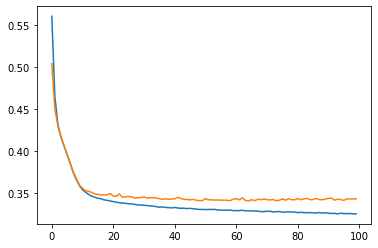

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

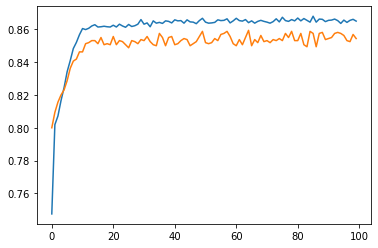

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [21]:
#Get values of weights of a layer
model.layers[0].get_weights()

[array([[ 1.81360185e-01, -1.58767998e-01, -3.09951961e-01,
         -1.60464093e-01,  2.47669071e-02, -1.30937889e-01,
         -2.63025641e-01,  2.05234848e-02, -1.39776871e-01,
          4.95540231e-01],
        [ 5.58790505e-01,  2.65456408e-01,  1.03854768e-01,
         -2.11487442e-01,  5.51187277e-01,  1.11531162e+00,
          4.91102010e-01,  4.78114337e-01, -5.54263294e-01,
         -5.56440353e-01],
        [-5.95304817e-02, -4.13067676e-02, -2.12317616e-01,
          8.60576108e-02,  1.37713954e-01, -7.63237625e-02,
         -3.15202534e-01,  3.99178535e-01, -2.07817599e-01,
         -2.31956244e-01],
        [ 2.58916020e-01, -4.32216406e-01,  6.92565739e-01,
         -6.04776181e-02,  1.77394953e-02,  1.26175195e-01,
          3.97682488e-02, -6.49555922e-02,  3.33603658e-02,
          2.24414349e-01],
        [-6.52680099e-01, -9.68143106e-01,  1.03409576e+00,
          6.31664932e-01,  1.01023674e+00,  3.62016737e-01,
         -1.83407083e-01,  4.51988727e-01, -6.434675

In [25]:
y_pred = np.where(model.predict(X_test_scaled) > 0.5 , 1,0)

63/63 [==============================] - 0s 4ms/step


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861